In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, eig
# from scipy.sparse.linalg import eigs
import scipy.io

# import sys
# sys.path.append("../")

# from algorithm.KoopPseudoSpec import KoopPseudoSpec
# from algorithm.PhasePlot import PhasePlot

import sys
sys.path.insert(0, 'C:\\Program Files\\MATLAB\\R2023a\\extern\\engines\\python')
import matlab.engine
eng = matlab.engine.start_matlab()
# Add the directory containing KoopPseudoSpec.m to MATLAB's path
eng.addpath('D:\\Residual-Dynamic-Mode-Decomposition-main\\main_routines', nargout=0)

In [2]:
# Load data from file available from the dropbox link
data = scipy.io.loadmat('D:\Residual-Dynamic-Mode-Decomposition-main\Examples_gallery_1\ResDMD_datasets\pendulum_data.mat')

In [3]:
A = data['A']
N1 = data['N1'][0][0]
N2 = data['N2'][0][0]

# Clear up the memory space
import gc
del data
gc.collect()

Id1 = np.maximum(np.outer(np.abs(np.arange(-1*N1, N1+1)), np.ones(N2)), 1)
Id2 = np.outer(np.ones(2*N1+1), np.arange(1, N2+1))
# N_trun = N2
N_trun = 50

Id = np.where(np.abs(Id1.flatten()) * np.abs(Id2.flatten()) < N_trun + 1)
A = A[Id][:, Id]  # sort out indexing
A = A.reshape((Id[0].shape[0],Id[0].shape[0]))
# A = A.reshape((964,964))

In [4]:
# Compute pseudospectra
x_pts = np.arange(-1.5, 1.5, 0.05)
y_pts = x_pts
z_pts = np.outer(x_pts, np.ones(len(y_pts))) + 1j * np.outer(np.ones(len(x_pts)), y_pts)
z_pts = z_pts.flatten()

RES, _, _ = eng.KoopPseudoSpec(np.eye(len(A)), A, np.eye(len(A)), z_pts,nargout=3)
# RES = KoopPseudoSpec(np.eye(len(A)), A, np.eye(len(A)), z_pts)
RES = RES.reshape(len(y_pts), len(x_pts))

# Clean up memory space from Matlab
eng.eval('clear all', nargout=0)

# RES = np.array(RES)
RES = np.asarray(RES)

In [5]:
# EDMD eigenvalues
E = eig(A)[0]

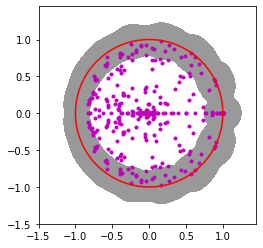

In [6]:
# Create a figure
plt.figure()

# Your MATLAB code uses a logarithmic scale for coloring based on the values of 1./real(RES),
# and specifies custom contour levels based on log10(1./v)
v = np.array([1e-50, 0.25])  # v array as specified in your MATLAB code
contour_levels = np.log10(1.0 / v)  # Calculate contour levels
contour_levels = sorted(list(contour_levels))
# Reshape real and imaginary parts of z_pts
real_z_reshaped = np.reshape(np.real(z_pts), (len(y_pts), len(x_pts))).T
imag_z_reshaped = np.reshape(np.imag(z_pts), (len(y_pts), len(x_pts))).T

# Get log10 of 1./real(RES)
log_res = np.log10(1.0 / np.real(RES))

# Create a filled contour plot
contour = plt.contourf(real_z_reshaped, imag_z_reshaped, log_res, levels=contour_levels, colors='#999999')

# Set the linewidth of the contour lines
for c in contour.collections:
    c.set_linewidth(1.5)
plt.gca().set_aspect('equal', 'box')
plt.plot(E.real, E.imag, '.m')
plt.plot(np.exp(1j * np.linspace(0, 2*np.pi, 1000)).real, np.exp(1j * np.linspace(0, 2*np.pi, 1000)).imag, '-r')
# Display the plot
plt.show()

In [7]:
# # Compute approximate eigenvalues and eigenfunctions
# E_test = [0.880347701848197 + 0.473226384533343j,
#           0.558620606228836 + 0.826563250517901j,
#           0.124674806328568 + 0.987209196182015j,
#           -0.314745042094750 + 0.936136228237800j]
# z = E_test[3]
# z = z / abs(z)

In [8]:
# xp1 = np.linspace(-np.pi, np.pi, 500)
# xp1 = xp1 + (xp1[1] - xp1[0]) / 2
# xp1 = xp1[:-1]
# xp2 = np.linspace(-4, 4, len(xp1))
# XpH = np.zeros((len(xp1), N2))
# XpH[:, 0] = np.exp(-0.5 * xp2**2) / np.pi**0.25
# XpH[:, 1] = XpH[:, 0] * np.sqrt(2) * xp2
# for j in range(2, N2):
#     XpH[:, j] = np.sqrt(2) / np.sqrt(j-1) * XpH[:, j-1] * xp2 - np.sqrt(j-2) / np.sqrt(j-1) * XpH[:, j-2]
# XpF = np.exp(1j * np.outer(np.arange(-1*N1, N1+1), xp1))

In [9]:
# H = np.eye(len(A)) - (z * A.T) - (z * A.T).conj() + abs(z)**2 * np.eye(len(A))
# V, D = eigs(H, k=1, which='SM')
# V2 = np.zeros(N2 * (2 * N1 + 1))
# V2[Id] = V
# V = V2.reshape(N2, 2*N1+1)
# PSI = (XpF.T @ V.T @ XpH.T).T

In [10]:
# PhasePlot(xp1 + 1j * xp2, PSI, 'm')
# plt.gca().fontsize = 14
# plt.show()